In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model
from sklearn.metrics import confusion_matrix, classification_report

In [134]:
loty = pd.read_csv('../content/flights.csv', nrows=200000)

In [135]:
loty

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2015,1,13,2,AA,2457,N487AA,DFW,LAS,2240,...,2326.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
199996,2015,1,13,2,DL,1542,N3769L,SEA,JFK,2240,...,721.0,37.0,0,0,NaN,30.0,0.0,7.0,0.0,0.0
199997,2015,1,13,2,AA,2386,N561AA,DFW,AUS,2240,...,2341.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
199998,2015,1,13,2,NK,199,N533NK,IAH,LAS,2240,...,2330.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
loty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 200000 non-null  int64  
 1   MONTH                200000 non-null  int64  
 2   DAY                  200000 non-null  int64  
 3   DAY_OF_WEEK          200000 non-null  int64  
 4   AIRLINE              200000 non-null  object 
 5   FLIGHT_NUMBER        200000 non-null  int64  
 6   TAIL_NUMBER          199598 non-null  object 
 7   ORIGIN_AIRPORT       200000 non-null  object 
 8   DESTINATION_AIRPORT  200000 non-null  object 
 9   SCHEDULED_DEPARTURE  200000 non-null  int64  
 10  DEPARTURE_TIME       195132 non-null  float64
 11  DEPARTURE_DELAY      195132 non-null  float64
 12  TAXI_OUT             194975 non-null  float64
 13  WHEELS_OFF           194975 non-null  float64
 14  SCHEDULED_TIME       200000 non-null  int64  
 15  ELAPSED_TIME     

<ipython-input-137-481e595deacf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loty.corr())


<Axes: >

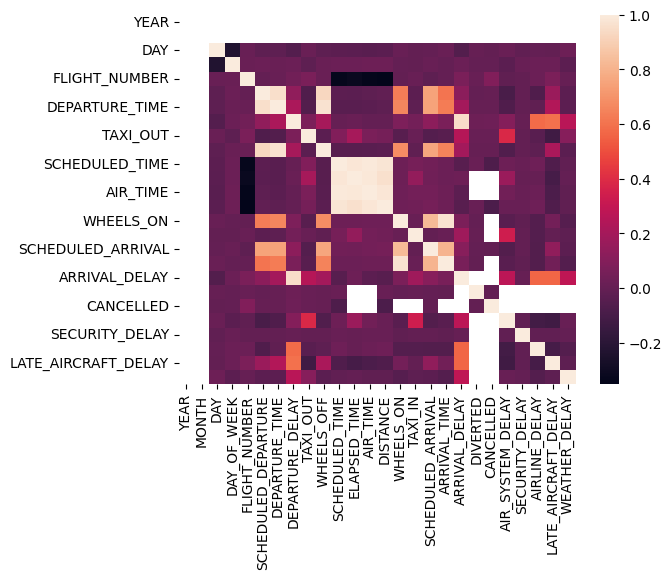

In [137]:
sns.heatmap(loty.corr())

<Axes: >

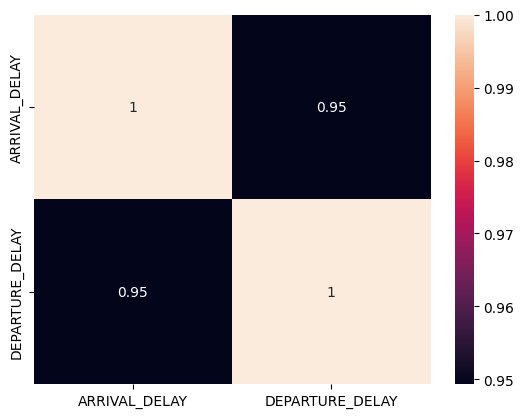

In [138]:
sns.heatmap(loty[['ARRIVAL_DELAY', 'DEPARTURE_DELAY']].corr(), annot=True)

In [139]:
loty2 = loty.copy()

In [140]:
loty2['DEPARTURE_DELAY'].max()

1450.0

In [142]:
loty2['DEPARTURE_DELAY'].mean()

16.952544943935386

In [143]:
loty2 = loty2.drop('YEAR', axis=1)
loty2 = loty2[loty2.DEPARTURE_DELAY>15]

In [144]:
loty2

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
20,1,1,4,NK,520,N525NK,LAS,MCI,55,120.0,...,543.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
29,1,1,4,AA,2392,N3HRAA,DEN,MIA,120,141.0,...,709.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30,1,1,4,NK,168,N629NK,PHX,ORD,125,237.0,...,632.0,43.0,0,0,NaN,43.0,0.0,0.0,0.0,0.0
52,1,1,4,B6,2134,N307JB,SJU,MCO,400,535.0,...,730.0,85.0,0,0,NaN,0.0,0.0,85.0,0.0,0.0
55,1,1,4,B6,2276,N646JB,SJU,BDL,438,550.0,...,908.0,89.0,0,0,NaN,17.0,0.0,72.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199934,1,13,2,AA,1216,N504AA,DFW,TUL,2210,2236.0,...,2322.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
199947,1,13,2,MQ,2910,N532MQ,ORD,DTW,2215,2311.0,...,225.0,121.0,0,0,NaN,65.0,0.0,0.0,51.0,5.0
199954,1,13,2,MQ,2942,N696MQ,ORD,DAY,2220,2316.0,...,132.0,72.0,0,0,NaN,16.0,0.0,0.0,56.0,0.0
199987,1,13,2,OO,6433,N984CA,LAX,FAT,2235,2304.0,...,2359.0,21.0,0,0,NaN,0.0,0.0,21.0,0.0,0.0


In [145]:
brakujace_kolumny=loty2.loc[:, loty2.isna().mean() >=0.25].columns

In [146]:
loty2=loty2.drop(brakujace_kolumny, axis=1)

In [147]:
loty2=loty2[loty2.CANCELLED !=1]
loty2=loty2[loty2.DIVERTED !=1]

In [148]:
loty2=loty2.drop(['DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'TAXI_OUT',
            'SCHEDULED_DEPARTURE', 'WHEELS_ON', 'WHEELS_OFF',
            'TAXI_IN', 'TAXI_OUT', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED'],
            axis=1)

In [149]:
loty2

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
20,1,4,NK,LAS,MCI,120.0,25.0,162,143.0,128.0,1139,543.0,6.0,NaN,NaN,NaN,NaN,NaN
29,1,4,AA,DEN,MIA,141.0,21.0,227,208.0,188.0,1709,709.0,2.0,NaN,NaN,NaN,NaN,NaN
30,1,4,NK,PHX,ORD,237.0,72.0,204,175.0,156.0,1440,632.0,43.0,43.0,0.0,0.0,0.0,0.0
52,1,4,B6,SJU,MCO,535.0,95.0,185,175.0,163.0,1189,730.0,85.0,0.0,0.0,85.0,0.0,0.0
55,1,4,B6,SJU,BDL,550.0,72.0,241,258.0,237.0,1666,908.0,89.0,17.0,0.0,72.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199934,1,2,AA,DFW,TUL,2236.0,26.0,59,46.0,33.0,237,2322.0,13.0,NaN,NaN,NaN,NaN,NaN
199947,1,2,MQ,ORD,DTW,2311.0,56.0,69,134.0,41.0,235,225.0,121.0,65.0,0.0,0.0,51.0,5.0
199954,1,2,MQ,ORD,DAY,2316.0,56.0,60,76.0,39.0,240,132.0,72.0,16.0,0.0,0.0,56.0,0.0
199987,1,2,OO,LAX,FAT,2304.0,29.0,63,55.0,40.0,209,2359.0,21.0,0.0,0.0,21.0,0.0,0.0


In [150]:
loty2=loty2.fillna(0)

In [151]:
loty2

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
20,1,4,NK,LAS,MCI,120.0,25.0,162,143.0,128.0,1139,543.0,6.0,0.0,0.0,0.0,0.0,0.0
29,1,4,AA,DEN,MIA,141.0,21.0,227,208.0,188.0,1709,709.0,2.0,0.0,0.0,0.0,0.0,0.0
30,1,4,NK,PHX,ORD,237.0,72.0,204,175.0,156.0,1440,632.0,43.0,43.0,0.0,0.0,0.0,0.0
52,1,4,B6,SJU,MCO,535.0,95.0,185,175.0,163.0,1189,730.0,85.0,0.0,0.0,85.0,0.0,0.0
55,1,4,B6,SJU,BDL,550.0,72.0,241,258.0,237.0,1666,908.0,89.0,17.0,0.0,72.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199934,1,2,AA,DFW,TUL,2236.0,26.0,59,46.0,33.0,237,2322.0,13.0,0.0,0.0,0.0,0.0,0.0
199947,1,2,MQ,ORD,DTW,2311.0,56.0,69,134.0,41.0,235,225.0,121.0,65.0,0.0,0.0,51.0,5.0
199954,1,2,MQ,ORD,DAY,2316.0,56.0,60,76.0,39.0,240,132.0,72.0,16.0,0.0,0.0,56.0,0.0
199987,1,2,OO,LAX,FAT,2304.0,29.0,63,55.0,40.0,209,2359.0,21.0,0.0,0.0,21.0,0.0,0.0


<ipython-input-152-6d8af02e9a49>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loty2.corr())


<Axes: >

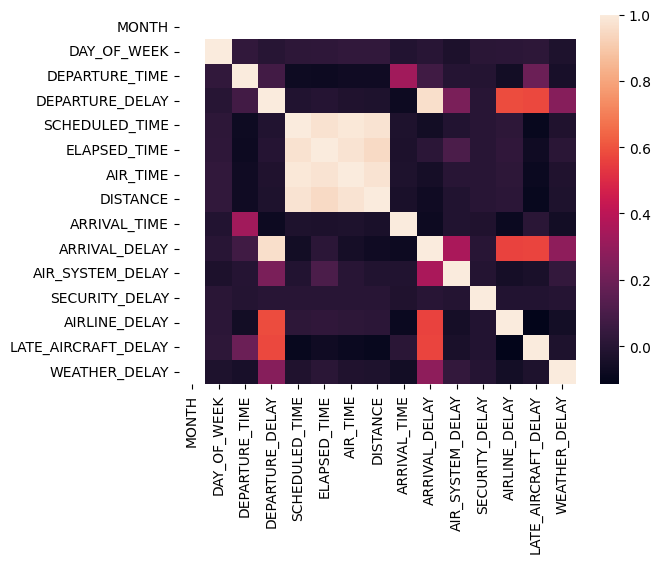

In [152]:
sns.heatmap(loty2.corr())

In [153]:
loty2=loty2.drop('ARRIVAL_DELAY', axis=1)

<ipython-input-154-6d8af02e9a49>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loty2.corr())


<Axes: >

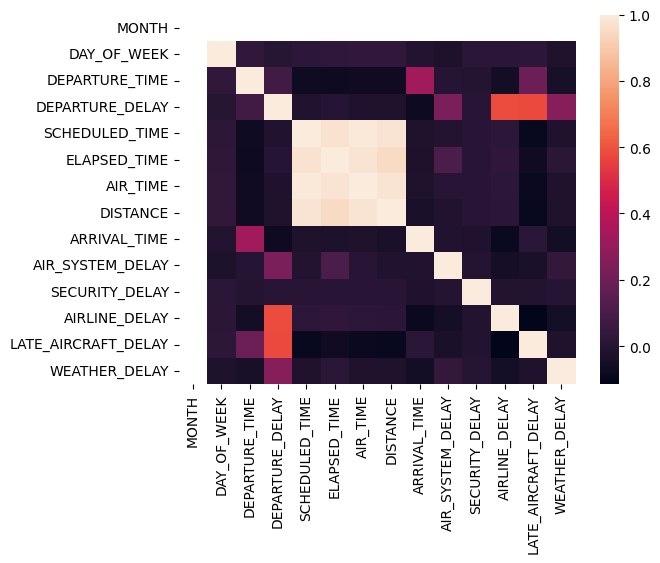

In [154]:
sns.heatmap(loty2.corr())

In [155]:
def encode_and_bind(original_dataframe, feature_to_encode):
  dummies = pd.DataFrame(original_dataframe[[feature_to_encode]])
  res = pd.concat([original_dataframe, dummies], axis=1)
  res = res.drop([feature_to_encode], axis=1)
  return(res)

In [156]:
features_to_encode = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

loty2_enc = encode_and_bind(loty2, features_to_encode[0])
loty2_enc = encode_and_bind(loty2_enc, features_to_encode[1])
loty2_enc = encode_and_bind(loty2_enc, features_to_encode[2])

loty2_enc.head(30)

,MONTH,DAY_OF_WEEK,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
20,1,4,120.0,25.0,162,143.0,128.0,1139,543.0,0.0,0.0,0.0,0.0,0.0
29,1,4,141.0,21.0,227,208.0,188.0,1709,709.0,0.0,0.0,0.0,0.0,0.0
30,1,4,237.0,72.0,204,175.0,156.0,1440,632.0,43.0,0.0,0.0,0.0,0.0
52,1,4,535.0,95.0,185,175.0,163.0,1189,730.0,0.0,0.0,85.0,0.0,0.0
55,1,4,550.0,72.0,241,258.0,237.0,1666,908.0,17.0,0.0,72.0,0.0,0.0
70,1,4,703.0,108.0,161,155.0,133.0,1121,1038.0,0.0,0.0,0.0,0.0,102.0
73,1,4,620.0,60.0,150,150.0,132.0,1009,950.0,0.0,0.0,60.0,0.0,0.0
74,1,4,618.0,58.0,141,137.0,111.0,964,935.0,0.0,0.0,54.0,0.0,0.0
86,1,4,623.0,53.0,125,138.0,96.0,641,941.0,13.0,0.0,53.0,0.0,0.0
92,1,4,550.0,19.0,146,153.0,127.0,967,923.0,7.0,0.0,19.0,0.0,0.0


In [157]:
y = loty2_enc['DEPARTURE_DELAY'].copy()
X = loty2_enc.drop('DEPARTURE_DELAY', axis=1).copy()

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=369)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.7, random_state=369)

In [159]:
lm = LinearRegression()
l_model = lm.fit(X_train, y_train)
l_predictions = pd.DataFrame(lm.predict(X_valid))
print(l_predictions.head(50))
print('MSE=', metrics.mean_squared_error(l_predictions, y_valid))

             0
0    15.508954
1    13.891957
2    39.039491
3   231.499839
4    33.699838
5    76.356715
6    33.071682
7    49.047995
8    10.798631
9    23.892583
10   19.292488
11   43.497911
12   44.779720
13   10.785544
14   59.236470
15   57.540244
16  149.036604
17   20.608215
18   54.967402
19   41.014922
20   63.722097
21  181.592834
22   59.035147
23   27.103212
24   29.169377
25   69.790264
26  107.325372
27   17.487199
28   25.508586
29   68.694351
30   30.015647
31   46.657303
32   59.672020
33   36.236589
34   21.446784
35   78.950882
36   26.089274
37   34.362432
38   46.551158
39   19.701314
40   26.338002
41   18.971603
42   42.602723
43   29.442945
44   57.086695
45   30.453308
46   55.114413
47   22.162540
48   23.399725
49  114.927588
MSE= 10.699547203333344


In [160]:
DT_regr = DecisionTreeRegressor(max_depth=3, random_state=369)
DT_model = DT_regr.fit(X_train, y_train)
DT_predictions = pd.DataFrame(DT_regr.predict(X_valid))
print(DT_predictions.head(50))
print('MSE=', metrics.mean_squared_error(DT_predictions, y_valid))

             0
0    45.562815
1    45.562815
2    45.562815
3   193.879336
4    45.562815
5    45.562815
6    45.562815
7    45.562815
8    45.562815
9    45.562815
10   45.562815
11   45.562815
12   45.562815
13   45.562815
14   45.562815
15   45.562815
16  166.006394
17   45.562815
18   45.562815
19   45.562815
20   45.562815
21  118.154412
22   45.562815
23   45.562815
24   45.562815
25   45.562815
26  118.154412
27   45.562815
28   45.562815
29   45.562815
30   45.562815
31   45.562815
32   45.562815
33   45.562815
34   45.562815
35   45.562815
36   45.562815
37   45.562815
38   45.562815
39   45.562815
40   45.562815
41   45.562815
42   45.562815
43   45.562815
44   45.562815
45   45.562815
46   45.562815
47   45.562815
48   45.562815
49  118.154412
MSE= 1339.7748402606724


In [161]:
DT_accuracy = DT_model.score(X_valid, y_valid)
print('DT_acuracy=' + str(DT_accuracy.round(2)))

DT_acuracy=0.64


In [162]:
from sklearn import tree

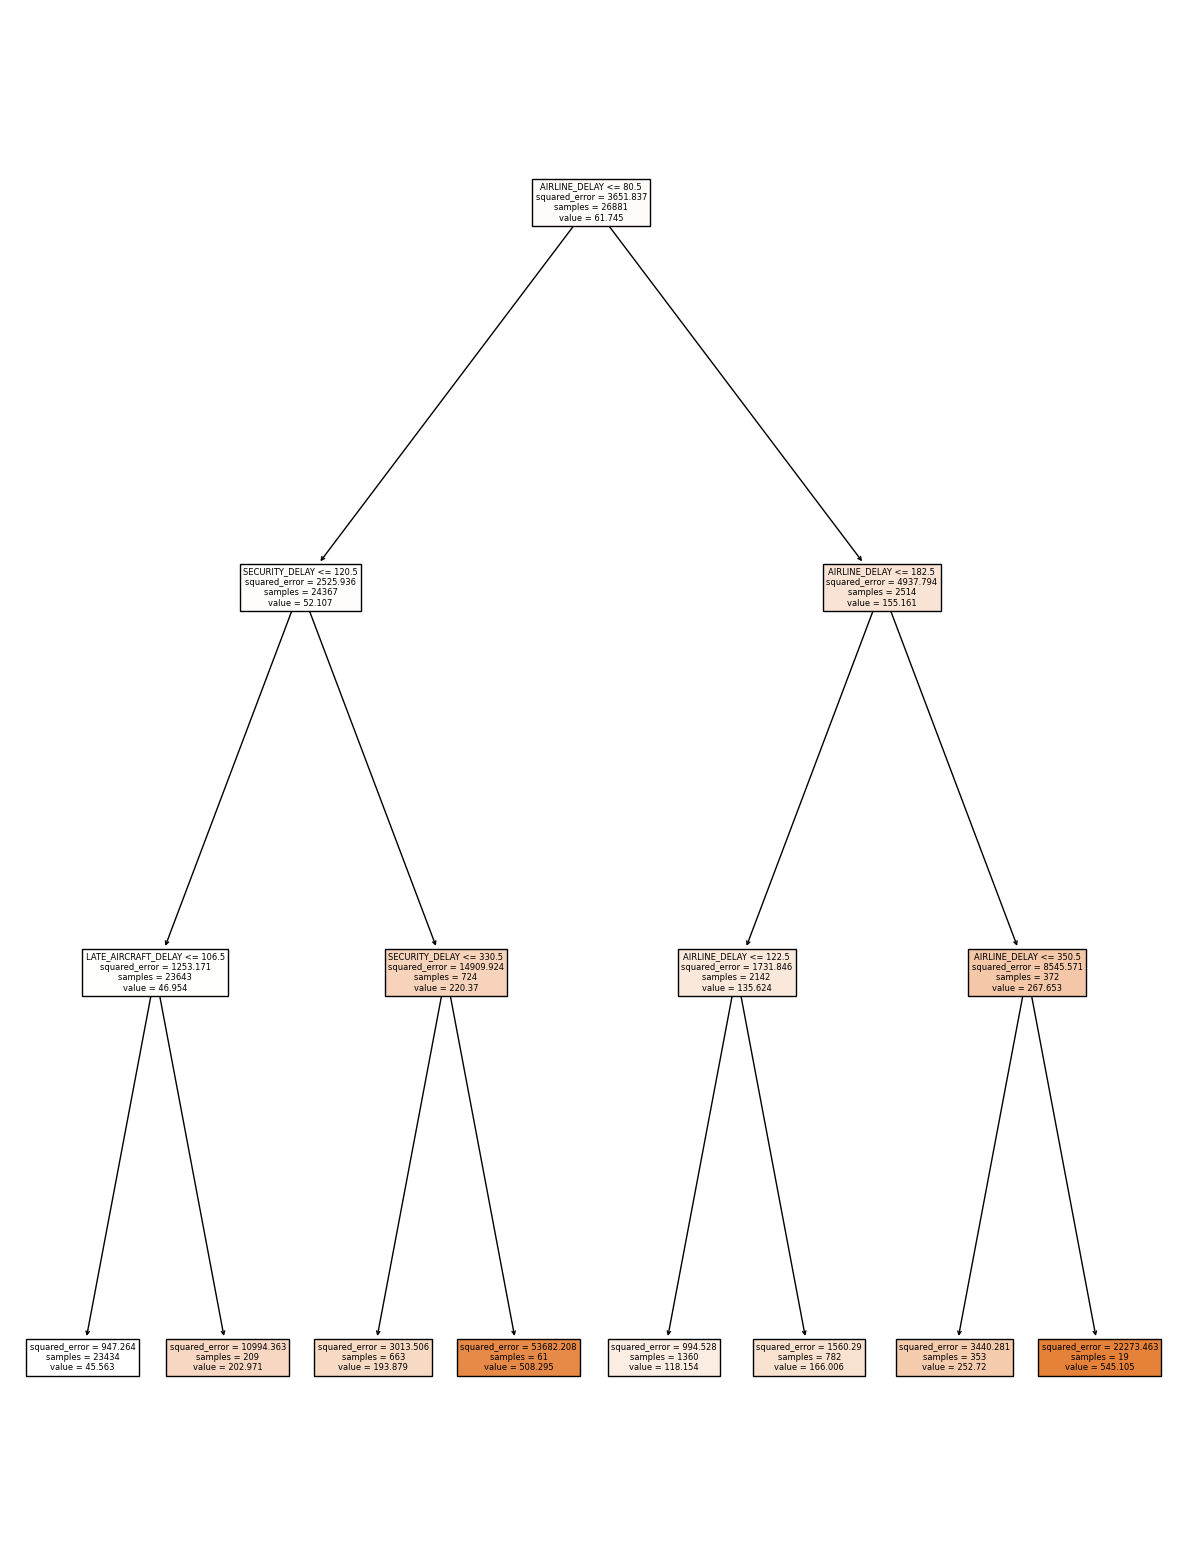

In [163]:
fig = plt.figure(figsize=(15,20))
_ = tree.plot_tree(DT_regr, feature_names=loty2_enc.columns, filled=True)


In [164]:
from sklearn.metrics import accuracy_score
max_depth_list = [3, 10, 30, 50, 80, 100]

accuracy = []

for x in max_depth_list:
  dtc = DecisionTreeRegressor(max_depth=x)
  dtc.fit(X_train, y_train)
  accuracy.append(dtc.score(X_valid, y_valid))

Text(0.5, 0, 'max depth')

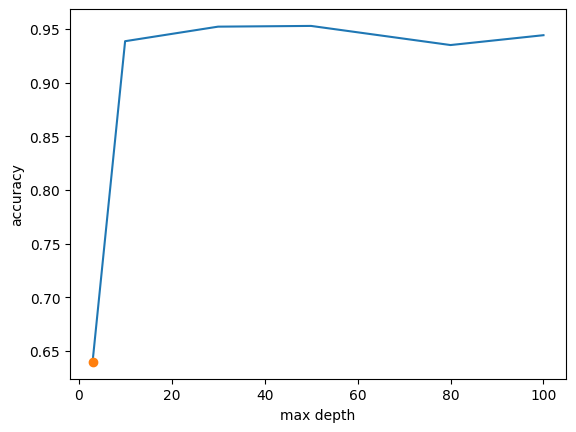

In [165]:
plt.plot(max_depth_list, accuracy)
plt.plot(max_depth_list[0], accuracy[0], marker='o')
plt.ylabel('accuracy')
plt.xlabel('max depth')

In [166]:
DT_regr = DecisionTreeRegressor(max_depth = 100, random_state = 369)
DT_model = DT_regr.fit(X_train, y_train)
DT_predictions = pd.DataFrame(DT_regr.predict(X_test))
print('MSE=', metrics.mean_squared_error(DT_predictions, y_test))
DT_accuracy = DT_model.score(X_test, y_test)
print('DT accuracy on test = ' + str(DT_accuracy.round(2)))

MSE= 186.84075581748587
DT accuracy on test = 0.95


In [167]:
loty2 = loty.copy()

In [168]:
loty2['DELAY'] = [1 if x > 15 else 0 for x in loty2['DEPARTURE_DELAY']]

In [169]:
missing_columns = loty2.loc[:, loty2.isna().mean() >= 0.25].columns
loty2 = loty2.drop(missing_columns, axis=1)

In [170]:
loty2 = loty2[loty2.CANCELLED !=1]
loty2 = loty2[loty2.DIVERTED !=1]

In [171]:
loty2 = loty2.drop(['YEAR', 'DAY', 'TAXI_IN', 'TAXI_OUT', 'WHEELS_ON',
                    'WHEELS_OFF', 'TAIL_NUMBER', 'DEPARTURE_DELAY',
                    'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
                    'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL',
                    'FLIGHT_NUMBER'], axis=1)

In [172]:
loty2 = loty2.fillna(0)

In [173]:
loty2.head(15)

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,DELAY
0,1,4,AS,ANC,SEA,2354.0,205,194.0,169.0,1448,408.0,0
1,1,4,AA,LAX,PBI,2.0,280,279.0,263.0,2330,741.0,0
2,1,4,US,SFO,CLT,18.0,286,293.0,266.0,2296,811.0,0
3,1,4,AA,LAX,MIA,15.0,285,281.0,258.0,2342,756.0,0
4,1,4,AS,SEA,ANC,24.0,235,215.0,199.0,1448,259.0,0
5,1,4,DL,SFO,MSP,20.0,217,230.0,206.0,1589,610.0,0
6,1,4,NK,LAS,MSP,19.0,181,170.0,154.0,1299,509.0,0
7,1,4,US,LAX,CLT,44.0,273,249.0,228.0,2125,753.0,0
8,1,4,AA,SFO,DFW,19.0,195,193.0,173.0,1464,532.0,0
9,1,4,DL,LAS,ATL,33.0,221,203.0,186.0,1747,656.0,0


In [174]:
features_to_encode = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

loty2_enc = encode_and_bind(loty2, features_to_encode[0])
loty2_enc = encode_and_bind(loty2_enc, features_to_encode[1])
loty2_enc = encode_and_bind(loty2_enc, features_to_encode[2])

In [175]:
loty2_enc.head(10)

,MONTH,DAY_OF_WEEK,DEPARTURE_TIME,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,DELAY
0,1,4,2354.0,205,194.0,169.0,1448,408.0,0
1,1,4,2.0,280,279.0,263.0,2330,741.0,0
2,1,4,18.0,286,293.0,266.0,2296,811.0,0
3,1,4,15.0,285,281.0,258.0,2342,756.0,0
4,1,4,24.0,235,215.0,199.0,1448,259.0,0
5,1,4,20.0,217,230.0,206.0,1589,610.0,0
6,1,4,19.0,181,170.0,154.0,1299,509.0,0
7,1,4,44.0,273,249.0,228.0,2125,753.0,0
8,1,4,19.0,195,193.0,173.0,1464,532.0,0
9,1,4,33.0,221,203.0,186.0,1747,656.0,0


In [203]:
y = loty2_enc['DELAY'].copy()
X = loty2_enc.drop('DELAY', axis=1).copy()

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    random_state=0)

In [205]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.7,
                                                      random_state=0)

In [206]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
model_acc = model.score(X_valid, y_valid)
print('Test accuracy:', model_acc*100,'%')

Test accuracy: 73.16039584558102 %


In [207]:
cm = confusion_matrix (y_true, y_pred)

In [211]:
clr = classification_report(y_true, y_pred, target_names=['Not delayed', 'delayed'])

In [212]:
print('confusion matrix:', cm)

confusion matrix: [[28960   437]
 [10520   907]]


In [213]:
print("\nClassification Report:\n", clr)


Classification Report:
               precision    recall  f1-score   support

 Not delayed       0.73      0.99      0.84     29397
     delayed       0.67      0.08      0.14     11427

    accuracy                           0.73     40824
   macro avg       0.70      0.53      0.49     40824
weighted avg       0.72      0.73      0.65     40824

